In [86]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [87]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [88]:
print(f"shape of x_train : {len(x_train)} and shape of X_test : {len(x_test)}")

shape of x_train : 60000 and shape of X_test : 10000


In [89]:
x_train.shape

(60000, 28, 28)

In [90]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

we can scale the data for better result range 0 to 1 

In [91]:
x_train = x_train/ 255
x_test  = x_test / 255

In [92]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

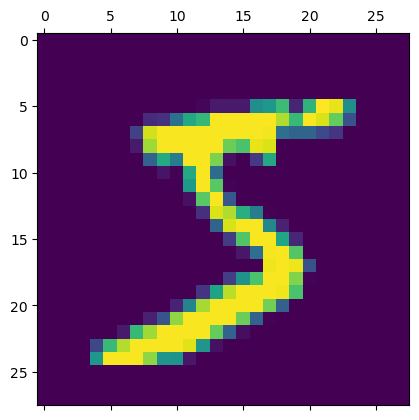

In [93]:
plt.matshow(x_train[0])

In [94]:
y_train[0]

5

28x28         which is 2D array we need make it 1D array 

In [95]:
x_train_flattened = x_train.reshape(-1,28*28)
x_test_flattened  = x_test.reshape(-1,28*28)

x_train_flattened.shape

(60000, 784)

Lets build a simple model 

In [96]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 783us/step - loss: 0.4731 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 1s 776us/step - loss: 0.3037 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 822us/step - loss: 0.2831 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9262


### Lets evalute on text datasets  

In [97]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2716 - accuracy: 0.9235


[0.27156761288642883, 0.9235000014305115]

lets make some sample predictions

In [98]:
y_pred = model.predict(x_test_flattened)
y_pred[0]

313/313 [==============================] - 0s 931us/step


array([2.1161538e-02, 4.2545429e-07, 5.3646870e-02, 9.6501642e-01,
       2.0033887e-03, 1.0565533e-01, 2.5197439e-06, 9.9981153e-01,
       1.3781571e-01, 6.7949635e-01], dtype=float32)

In [99]:
np.argmax(y_pred[0])

7

model predcietd it as 7 so lets check it real 

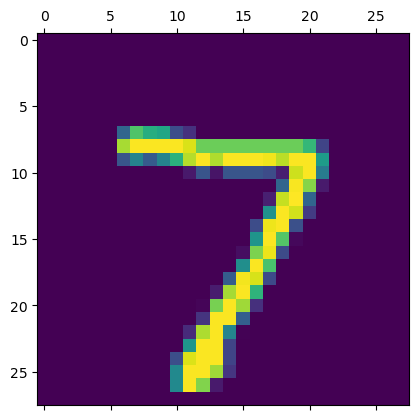

In [100]:
plt.matshow(x_test[0])

wow its working...............

In [101]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [102]:
y_pred

array([[2.1161538e-02, 4.2545429e-07, 5.3646870e-02, ..., 9.9981153e-01,
        1.3781571e-01, 6.7949635e-01],
       [3.2587355e-01, 7.1082041e-03, 9.9918532e-01, ..., 5.3366686e-13,
        1.7612104e-01, 1.9435564e-09],
       [4.0342193e-04, 9.9445534e-01, 6.0569513e-01, ..., 1.1883324e-01,
        4.3437061e-01, 4.6605412e-02],
       ...,
       [3.5494588e-06, 5.3076624e-06, 8.2226295e-04, ..., 2.1791396e-01,
        6.2076724e-01, 7.2525471e-01],
       [7.9867976e-05, 1.5796648e-04, 9.3877308e-05, ..., 3.2488777e-05,
        6.5525436e-01, 6.8819616e-05],
       [3.2739083e-03, 3.5864375e-10, 1.4373435e-01, ..., 1.6973461e-08,
        1.8123344e-04, 5.6989001e-07]], dtype=float32)

we need change to target number like y_test so 

In [103]:
y_pred_edited = [np.argmax(i)  for i in y_pred]
y_pred_edited[:5]

[7, 2, 1, 0, 4]

#### lets check the confusion matrix 

In [104]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_edited)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    1,    2,    0,    5,   12,    2,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,   11,  910,   22,    6,    4,   13,   10,   49,    4],
       [   1,    0,   12,  941,    0,   12,    3,   10,   26,    5],
       [   1,    1,    2,    2,  912,    0,   13,    4,   11,   36],
       [   7,    3,    2,   50,    8,  741,   20,    5,   49,    7],
       [   7,    3,    4,    1,    7,    8,  923,    2,    3,    0],
       [   1,    5,   20,   10,    7,    0,    0,  948,    5,   32],
       [   4,    7,    5,   22,    9,   18,   10,    9,  885,    5],
       [   9,    7,    2,   13,   23,    5,    0,   25,   14,  911]])>

Text(95.72222222222221, 0.5, 'Actual')

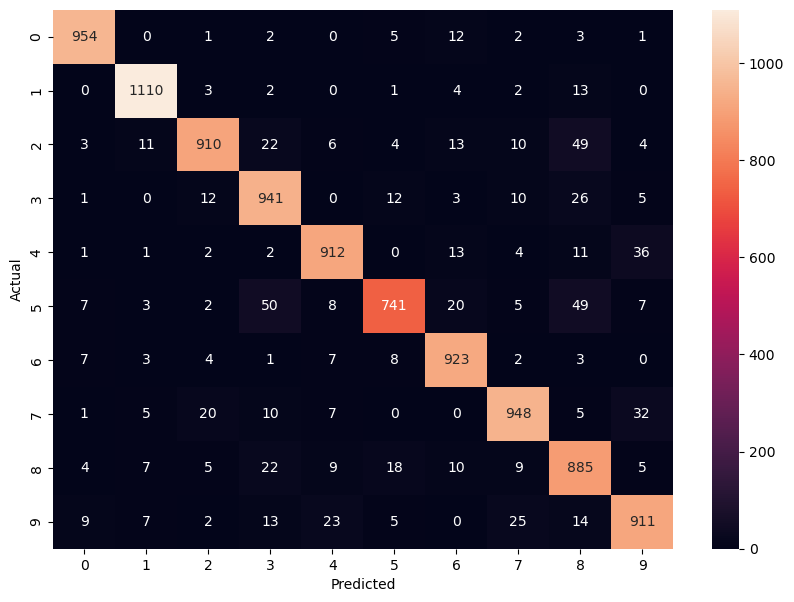

In [105]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

- 963 times model predcietd as 0  (correct)  and 7 times model predcietd 0 as 6            like that it read

We only used one layer no hidden layer that perfromance is above            next we will try out hiddena and its perfromance

In [106]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2741 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1264 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0898 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0680 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0551 - accuracy: 0.9829


In [107]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0902 - accuracy: 0.9734


[0.09015807509422302, 0.9733999967575073]

In [108]:
y_pred = model.predict(x_test_flattened)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([9.2436094e-03, 1.9924011e-04, 1.9066066e-01, 6.3867044e-01,
       1.5506233e-06, 1.3954452e-03, 6.6901347e-09, 9.9992412e-01,
       2.2240752e-02, 1.7939986e-01], dtype=float32)

In [109]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_edited)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    1,    2,    0,    5,   12,    2,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,   11,  910,   22,    6,    4,   13,   10,   49,    4],
       [   1,    0,   12,  941,    0,   12,    3,   10,   26,    5],
       [   1,    1,    2,    2,  912,    0,   13,    4,   11,   36],
       [   7,    3,    2,   50,    8,  741,   20,    5,   49,    7],
       [   7,    3,    4,    1,    7,    8,  923,    2,    3,    0],
       [   1,    5,   20,   10,    7,    0,    0,  948,    5,   32],
       [   4,    7,    5,   22,    9,   18,   10,    9,  885,    5],
       [   9,    7,    2,   13,   23,    5,    0,   25,   14,  911]])>

Text(95.72222222222221, 0.5, 'Actual')

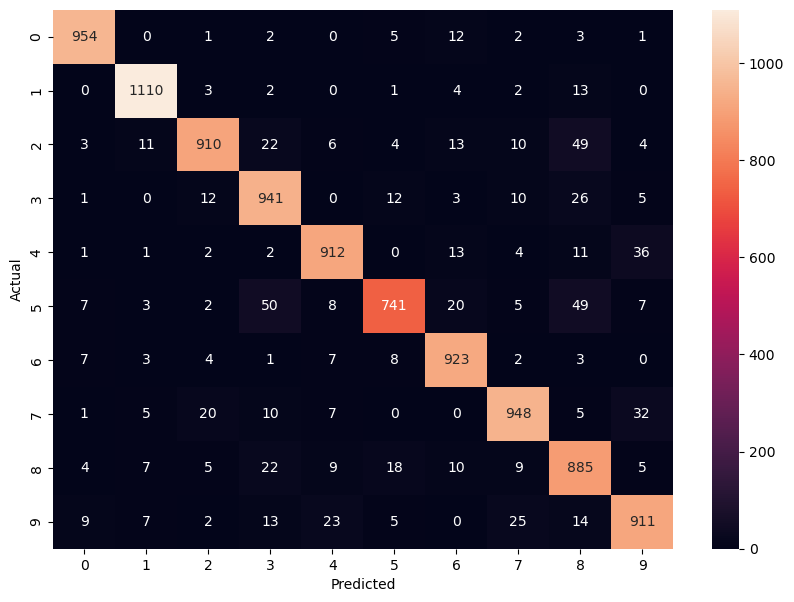

In [110]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')